In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv
/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
lung_cancer_survey_data=pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")

lung_cancer_survey_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [3]:
lung_cancer_survey_data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [4]:
lung_cancer_survey_data.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
lung_cancer_survey_data.shape


(309, 16)

In [6]:
lung_cancer_survey_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:

dummy_encoded_data = pd.get_dummies(lung_cancer_survey_data [['LUNG_CANCER', 'GENDER']])
print(dummy_encoded_data)

     LUNG_CANCER_NO  LUNG_CANCER_YES  GENDER_F  GENDER_M
0                 0                1         0         1
1                 0                1         0         1
2                 1                0         1         0
3                 1                0         0         1
4                 1                0         1         0
..              ...              ...       ...       ...
304               0                1         1         0
305               0                1         0         1
306               0                1         0         1
307               0                1         0         1
308               0                1         0         1

[309 rows x 4 columns]


In [8]:
lung_cancer_survey_data=pd.concat((lung_cancer_survey_data,dummy_encoded_data),axis=1)
lung_cancer_survey_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,LUNG_CANCER_NO,LUNG_CANCER_YES,GENDER_F,GENDER_M
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1,0,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1,0,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0,1,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0,0,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1,1,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,0,1,0,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,0,1,0,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,0,1,0,1


In [9]:
lung_cancer_survey_data=lung_cancer_survey_data.drop(['GENDER_F'],axis=1)
lung_cancer_survey_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,LUNG_CANCER_NO,LUNG_CANCER_YES,GENDER_M
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,0,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,0,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,0,1,1


In [10]:
lung_cancer_survey_data=lung_cancer_survey_data.drop(['LUNG_CANCER_NO'],axis=1)
lung_cancer_survey_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,LUNG_CANCER_YES,GENDER_M
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,1,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [11]:
lung_cancer_survey_data=lung_cancer_survey_data.drop(['GENDER'],axis=1)
lung_cancer_survey_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,LUNG_CANCER_YES,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [12]:
lung_cancer_survey_data=lung_cancer_survey_data.drop(['LUNG_CANCER'],axis=1)
lung_cancer_survey_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


In [13]:
lung_cancer_survey_data=lung_cancer_survey_data.rename(columns={'LUNG_CANCER_YES':'LUNG_CANCER','GENDER_M':'GENDER'})
lung_cancer_survey_data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


In [14]:
corr_data=lung_cancer_survey_data.corr()["LUNG_CANCER"]
corr_data[np.argsort(corr_data,axis=0)[::-1]]

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64

# Check for Duplicate Values

In [15]:
lung_cancer_survey_data.duplicated().sum()

33

# Drop Duplicates

In [16]:
lung_cancer_survey_data.drop_duplicates(inplace=True)

In [17]:
lung_cancer_survey_data.shape

(276, 16)

# Exploratory Data Analysis

In [18]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in lung_cancer_survey_data.columns:
    if i!='AGE':
        cat_col.append(i)

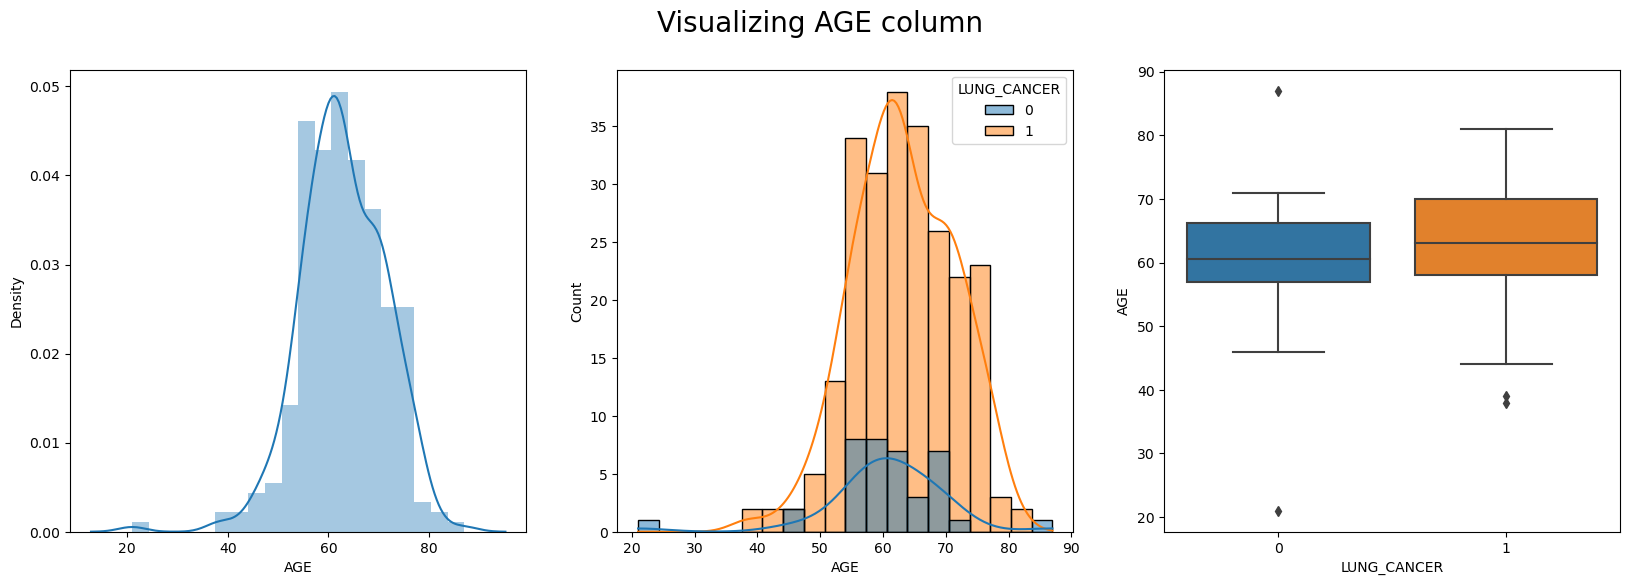

In [19]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(lung_cancer_survey_data['AGE'],ax=ax[0])
sns.histplot(data =lung_cancer_survey_data,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=lung_cancer_survey_data['LUNG_CANCER'],y=lung_cancer_survey_data['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

> As it can be seen from the figure most people are of age grojup from 50 - 70.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

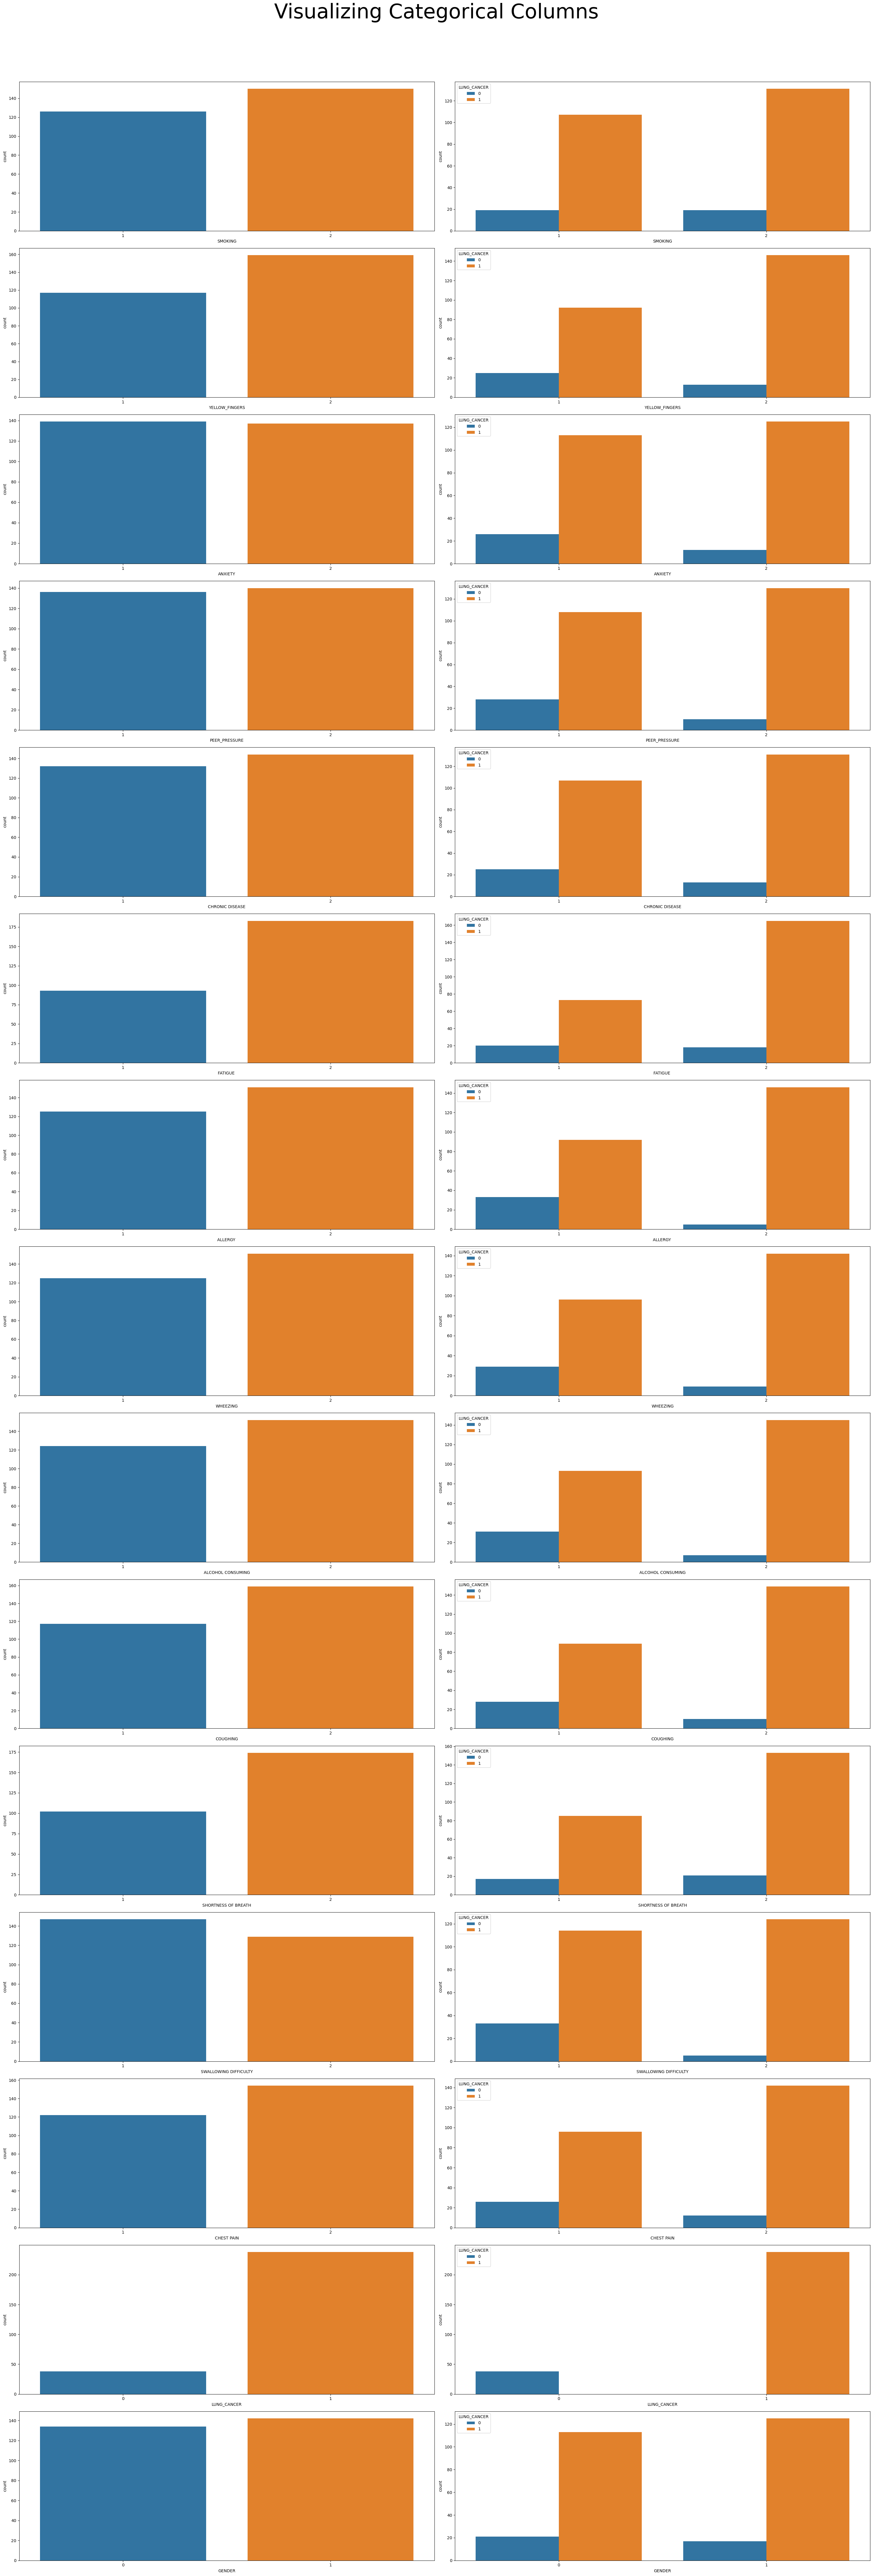

In [20]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=lung_cancer_survey_data,x=i,ax=ax[index,0])
    sns.countplot(data=lung_cancer_survey_data,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

> As it can be observed from the chart above the samples with lung cancer are in higher number than that of which do not have lung cancer.

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

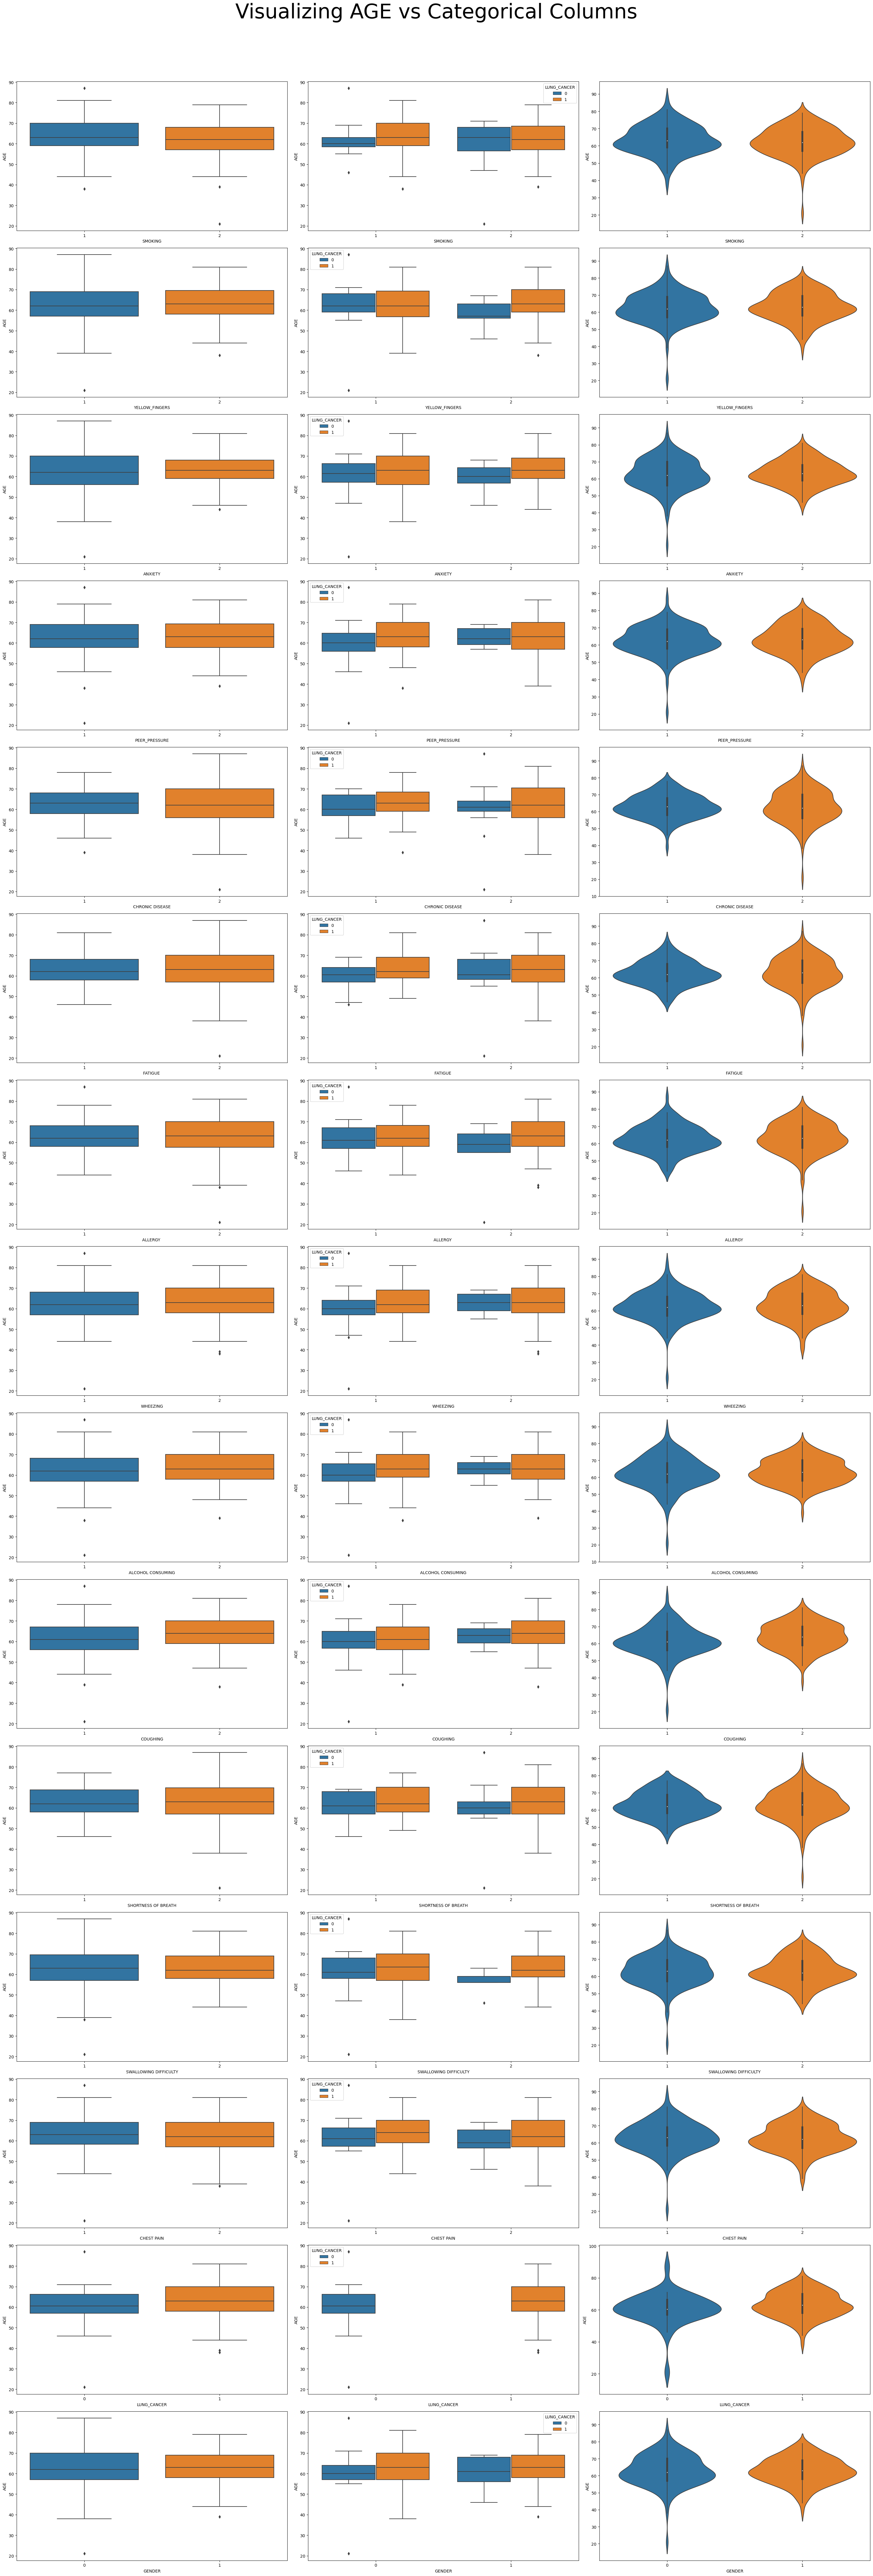

In [21]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=lung_cancer_survey_data[i],y=lung_cancer_survey_data['AGE'],ax=ax[index,0])
    sns.boxplot(x=lung_cancer_survey_data[i],y=lung_cancer_survey_data['AGE'],ax=ax[index,1],hue=lung_cancer_survey_data['LUNG_CANCER'])
    sns.violinplot(x=lung_cancer_survey_data[i],y=lung_cancer_survey_data['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

<AxesSubplot:>

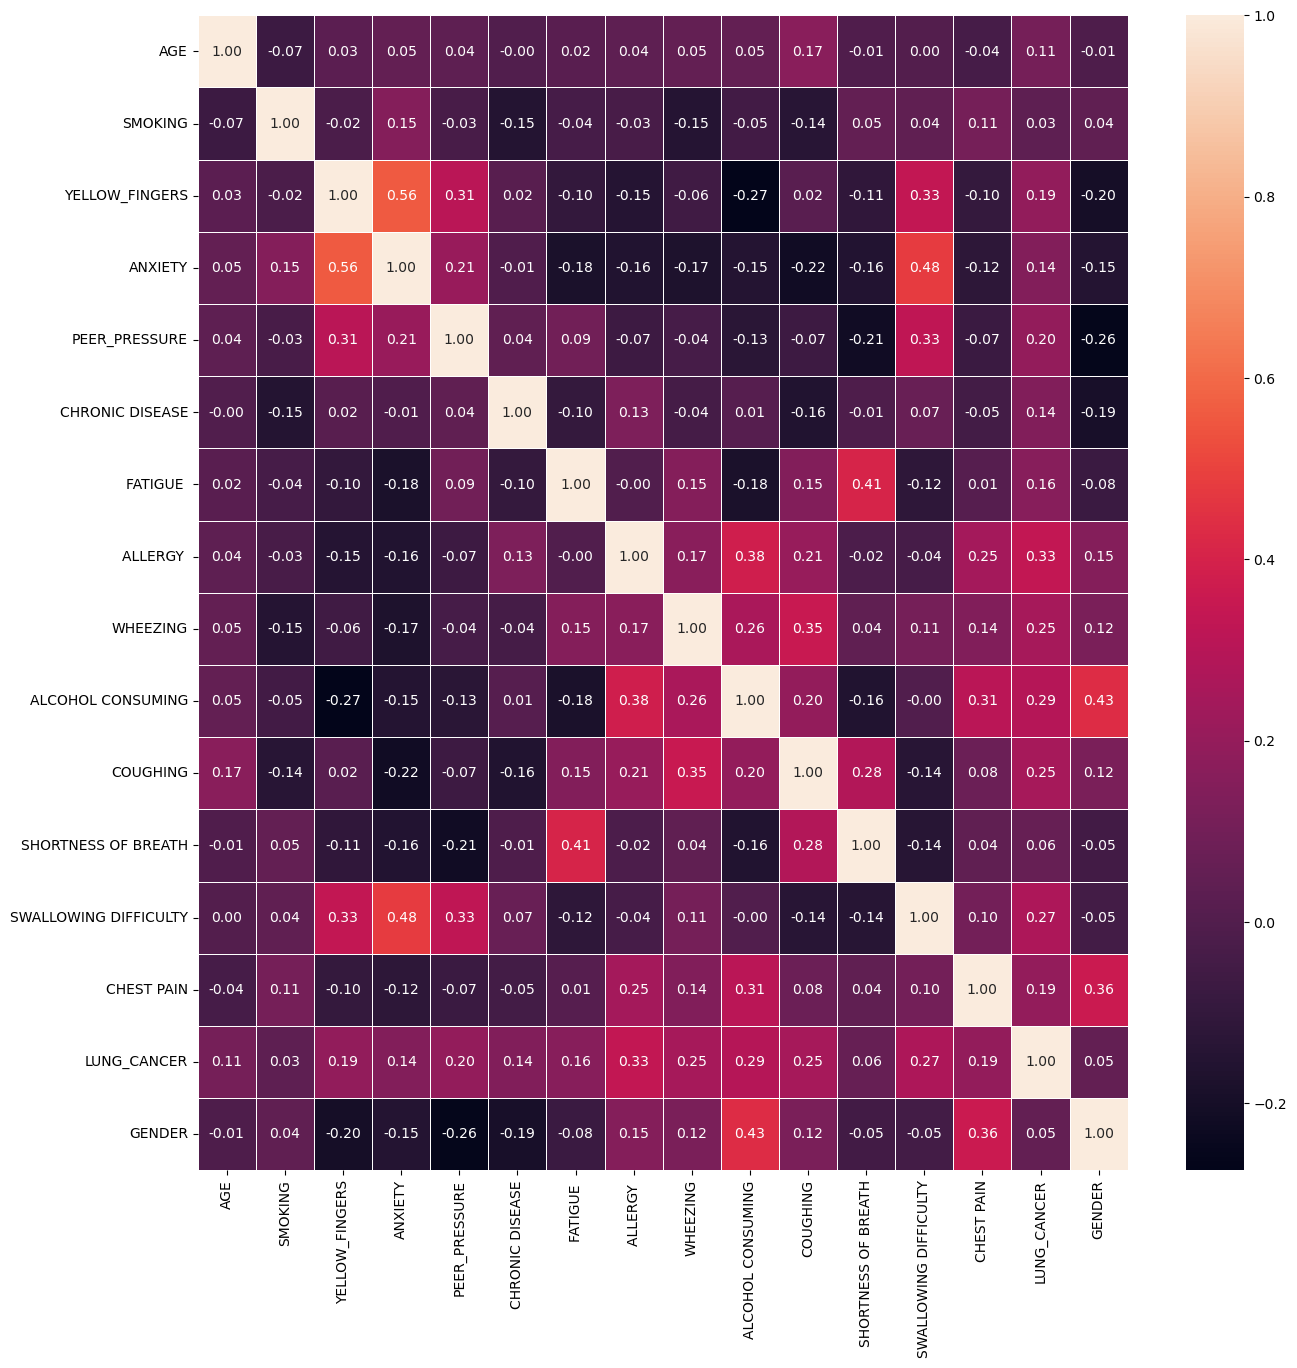

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(lung_cancer_survey_data.corr(),annot=True,linewidth=0.5,fmt='0.2f')

> There is multicollinearity present in the dataset.

# Data Preprocessing

**Separating independent and dependent features**

In [23]:
X=lung_cancer_survey_data.drop(['LUNG_CANCER'],axis=1)
y=lung_cancer_survey_data['LUNG_CANCER']

**Changing the values of column from 2,1 to 0,1**

In [24]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER
0,69,1,1,1,0,0,1,0,1,1,1,1,1,1,0
1,74,2,0,0,0,1,1,1,0,0,0,1,1,1,0
2,59,1,0,0,1,0,1,0,1,0,1,1,0,1,-1
3,63,2,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,1,1,0,0,0,0,0,1,0,1,1,0,0,-1


**Oversampling the minority class**

In [25]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

**Train,Test,Split**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


**Scaling of Age Column**

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER
321,-0.488888,1,0,0,0,0,1,0,0,0,0,1,0,0,-1
336,-0.375037,2,0,0,0,1,1,1,0,0,0,1,0,0,-1
334,2.812780,1,0,0,0,1,1,0,0,0,0,1,0,0,-1
151,0.194216,2,1,0,1,1,0,0,0,0,0,0,0,0,-1
314,0.763469,2,0,0,1,0,0,0,0,0,0,0,0,1,0


# Model Building 

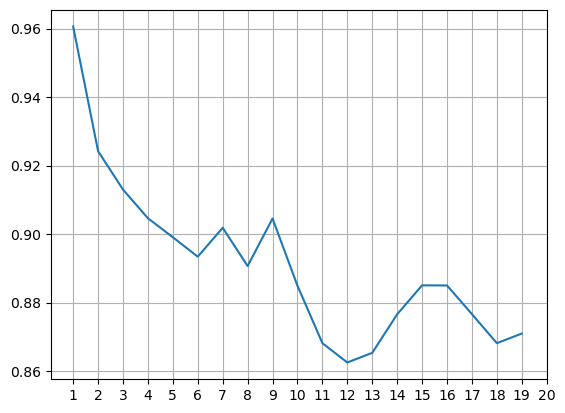

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



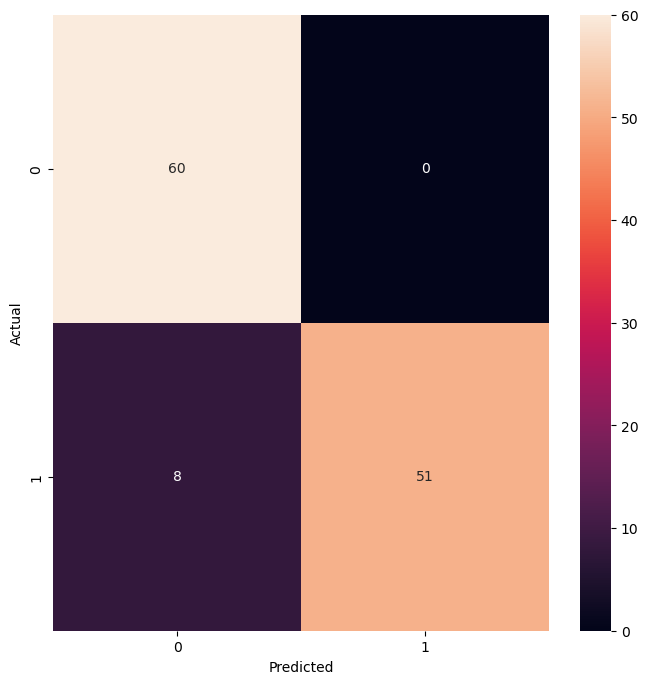

In [29]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.95      0.97        59

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.98      0.97      0.97       119


Best Parameters of SVC model is : {'gamma': 1, 'C': 10}



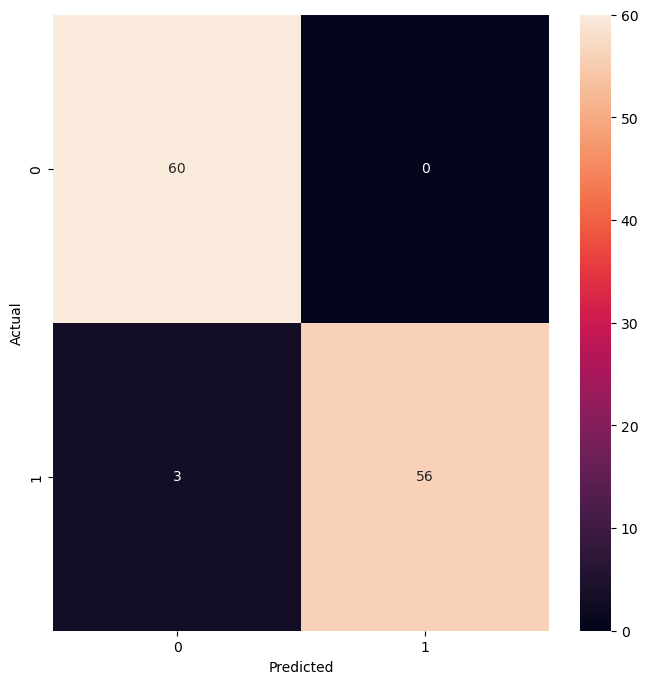

In [30]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

# Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        60
           1       0.98      0.85      0.91        59

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



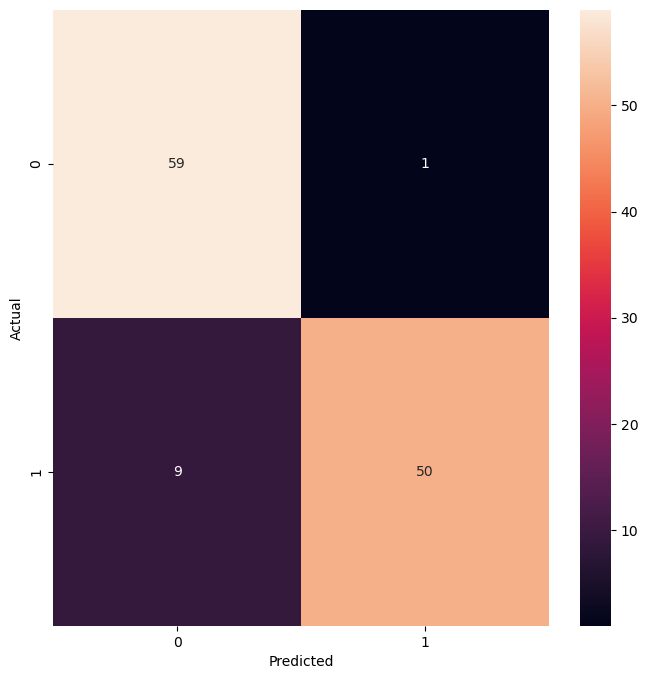

In [31]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 75}



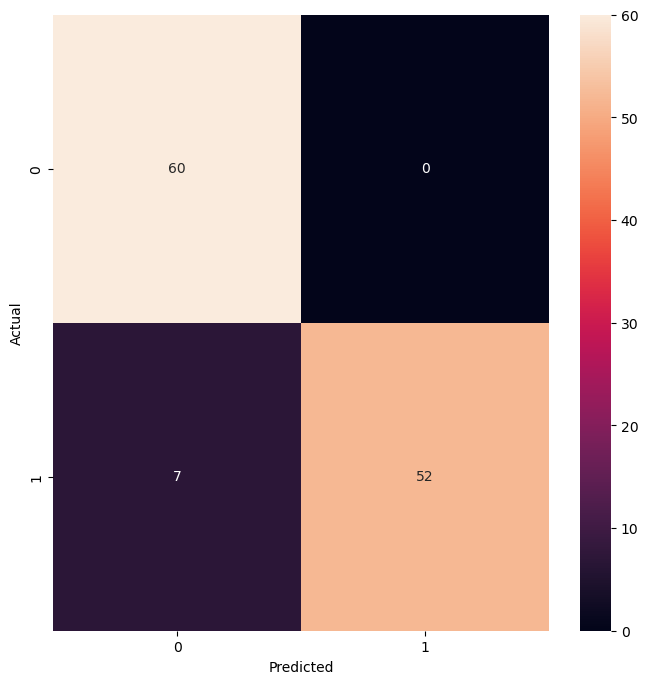

In [32]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameter: {'n_estimators': 50, 'learning_rate': 0.75}



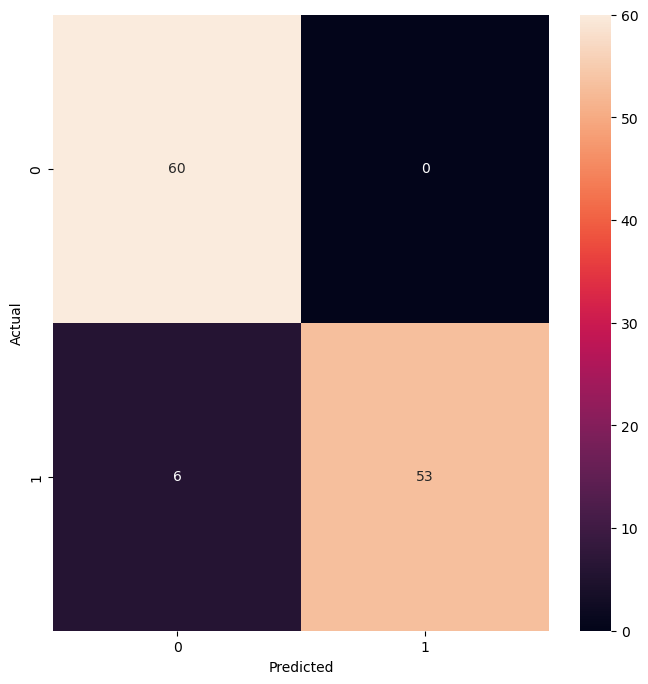

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

# LGBM Classifier

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119



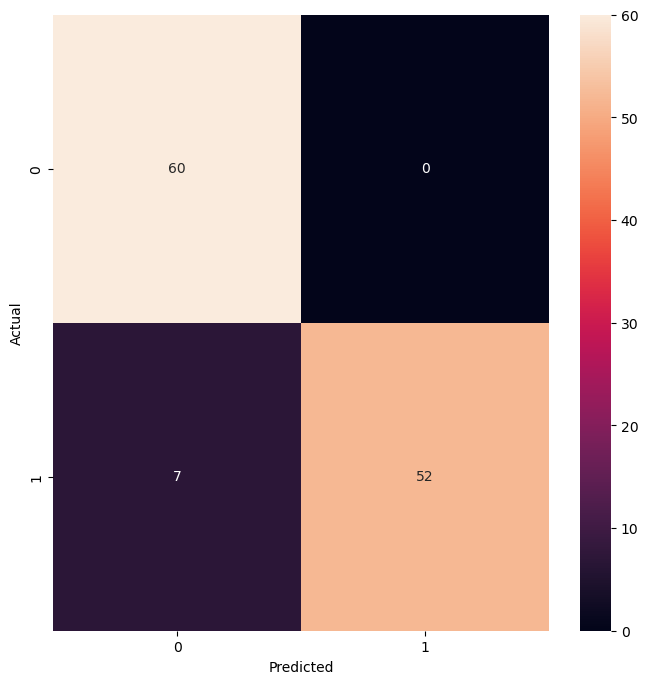

In [34]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

# Selected Model - SVC

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.97      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



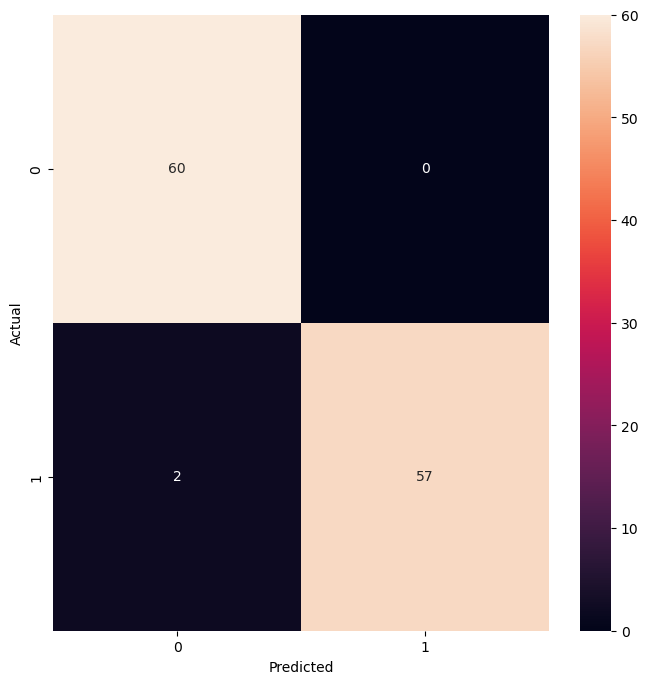

In [35]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

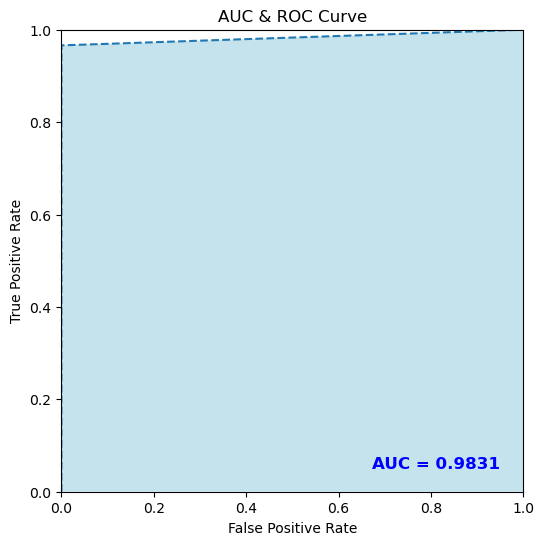

In [36]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
